# 1 IMPORT LIBRARIES AND DATASETS

**1.1 LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

**1.2 IMPORT AND UNDERSTAND CAB DATA**

Import cab data

In [2]:
df_cab = pd.read_csv("Cab_Data.csv")

In [3]:
df_cab.head()

,"Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip"
0,"10000011,42377,Pink Cab,ATLANTA GA,30.45,370.9..."
1,"10000012,42375,Pink Cab,ATLANTA GA,28.62,358.5..."
2,"10000013,42371,Pink Cab,ATLANTA GA,9.04,125.2,..."
3,"10000014,42376,Pink Cab,ATLANTA GA,33.17,377.4..."
4,"10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62..."


In [4]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 1 columns):
 #   Column                                                                              Non-Null Count   Dtype 
---  ------                                                                              --------------   ----- 
 0   Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip  359392 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB


The entire data is contained in a single column. Thus, we need to disaggregate the data.

**Split the data into different columns and drop the column that had everything**

In [5]:
df_cab[["Transaction ID","Date of Travel","Company","City","KM_Travelled","Price_Charged","Cost_of_Trip"]] = df_cab["Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip"].str.split(",", expand=True)
df_cab.drop(columns = "Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip", inplace=True)

In [6]:
df_cab.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [7]:
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.2,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.4,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


The data is now spread into different columns but we still need to convert the type of some of the columns

**Convert "KM_trabelled", "Price_Charged", and "Cost_of_Trip" data from object to float**

In [8]:
df_cab[["KM_Travelled", "Price_Charged", "Cost_of_Trip"]] = df_cab[["KM_Travelled", "Price_Charged", "Cost_of_Trip"]].astype(float)

**Convert "Transaction ID" and "Data of Travel" data from object to int**

In [9]:
df_cab[["Transaction ID", "Date of Travel"]] = df_cab[["Transaction ID", "Date of Travel"]].astype(int)

In [10]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int32  
 1   Date of Travel  359392 non-null  int32  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
dtypes: float64(3), int32(2), object(2)
memory usage: 16.5+ MB


In [11]:
df_cab.tail()

,Transaction ID,Date of Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


The last row of the data has NaN values in three columns and the data in the columns that do not have NaN is very different from the type of data presented in the remaining rows. Thus, this row shall be dropped.

**Drop the last row**

In [12]:
df_cab = df_cab.dropna()

In [13]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int32  
 1   Date of Travel  359392 non-null  int32  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
dtypes: float64(3), int32(2), object(2)
memory usage: 16.5+ MB


The data type of the second column needs to be changed.

**Change the data type of column "Date of Travel"**

In [14]:
travel_date = df_cab['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in travel_date]
df_cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [15]:
df_cab.describe()

,Transaction ID,KM_Travelled,Price_Charged,Cost_of_Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [16]:
df_cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

As seen above, there are only two companies being described in the data

In [17]:
df_cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

**1.3 IMPORT AND UNDERSTAND CITY DATA**

Import city data

In [18]:
df_city = pd.read_csv("City_data.csv")

In [19]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   City        20 non-null     object 
 2   Population  20 non-null     object 
 3   Users       20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


In [20]:
df_city.head()

,Unnamed: 0,City,Population,Users
0,NaN,NEW YORK NY,"8,405,837","302,149"
1,NaN,CHICAGO IL,"1,955,130","164,468"
2,NaN,LOS ANGELES CA,"1,595,037","144,132"
3,NaN,MIAMI FL,"1,339,155","17,675"
4,NaN,SILICON VALLEY,"1,177,609","27,247"


The first column is unnamed and filled with NaN values. Thus, it need to be removed.

The data in the opulation and Users columns have comma in them and are objects. 
The commas need to be removed and the data type converted

**Drop the first column**

In [21]:
df_city.drop(columns = "Unnamed: 0", inplace=True)

**Remove commas from the data in the Population column and convert the data to integer**

In [22]:
df_city['Population'] = [x.replace(',','') for x in df_city['Population']]
df_city['Population'] = df_city['Population'].astype(int)

**Remove commas from the data in the Users column and convert the data to integer**

In [23]:
df_city['Users'] = [x.replace(',','') for x in df_city['Users']]
df_city['Users'] = df_city['Users'].astype(int)

In [24]:
df_city.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [25]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [26]:
df_city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [27]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


**1.4 IMPORT AND UNDERSTAND CUSTOMER ID DATA**

Import customer ID

In [28]:
df_customer_ID = pd.read_csv("Customer_ID.csv")

In [29]:
df_customer_ID.head()

,"Customer ID,Gender,Age,Income (USD/Month)"
0,"29290,Male,28,10813"
1,"27703,Male,27,9237"
2,"28712,Male,53,11242"
3,"28020,Male,23,23327"
4,"27182,Male,33,8536"


In [30]:
df_customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Customer ID,Gender,Age,Income (USD/Month)  49171 non-null  object
dtypes: object(1)
memory usage: 384.3+ KB


The entire data is presented in a single column. 
Let us disaggregate it.

**Disagreggate the column**

In [31]:
df_customer_ID[["Customer ID", "Gender", "Age", "Income (USD/Month)"]] = df_customer_ID['Customer ID,Gender,Age,Income (USD/Month)'].str.split(",", expand=True)

**Drop the original column**

In [32]:
df_customer_ID.drop(columns = "Customer ID,Gender,Age,Income (USD/Month)", inplace=True)

In [33]:
df_customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  object
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  object
 3   Income (USD/Month)  49171 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


**convert the data type of Age and Income columns to int**

In [34]:
df_customer_ID[["Customer ID", "Age", "Income (USD/Month)"]] = df_customer_ID[["Customer ID", "Age", "Income (USD/Month)"]].astype(int)

In [35]:
df_customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int32 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int32 
 3   Income (USD/Month)  49171 non-null  int32 
dtypes: int32(3), object(1)
memory usage: 960.5+ KB


In [36]:
df_customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [37]:
df_customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int32 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int32 
 3   Income (USD/Month)  49171 non-null  int32 
dtypes: int32(3), object(1)
memory usage: 960.5+ KB


In [38]:
df_customer_ID.describe(include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


**1.5 IMPORT AND UNDERSTAND TRANSACTION ID DATA**

In [39]:
df_transaction_id = pd.read_csv("Transaction_ID.csv")

In [40]:
df_transaction_id.head()

,"Transaction ID,Customer ID,Payment_Mode"
0,"10000011,29290,Card"
1,"10000012,27703,Card"
2,"10000013,28712,Cash"
3,"10000014,28020,Cash"
4,"10000015,27182,Card"


In [41]:
df_transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 1 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Transaction ID,Customer ID,Payment_Mode  440098 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


The entire data is presented in a single column. It needs to be disagreggated and convert to the right data types

**Disagreggate the data**

In [42]:
df_transaction_id[["Transaction ID", "Customer ID", "Payment_Mode"]] = df_transaction_id['Transaction ID,Customer ID,Payment_Mode'].str.split(",", expand=True)
df_transaction_id.drop(columns = "Transaction ID,Customer ID,Payment_Mode", inplace=True)

In [43]:
df_transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


**Convert Transaction and Customer ID data type to integer**

In [44]:
df_transaction_id[["Transaction ID", "Customer ID"]] = df_transaction_id[["Transaction ID", "Customer ID"]].astype(int)

In [45]:
df_transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int32 
 1   Customer ID     440098 non-null  int32 
 2   Payment_Mode    440098 non-null  object
dtypes: int32(2), object(1)
memory usage: 6.7+ MB


In [46]:
df_transaction_id.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [47]:
df_transaction_id.describe(include = 'all', datetime_is_numeric = True)

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


**1.6 MERGE THE ENTIRE DATA INTO A SIGNLE DATAFRAME**

In [48]:
df_master = df_cab.merge(df_transaction_id, on= 'Transaction ID').merge(df_customer_ID, on ='Customer ID').merge(df_city, on = 'City')

In [49]:
df_master.head()

,Transaction ID,Date of Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


# 2 EXPLORATORY DATA ANALYSIS

**2.01 DATA VISUALIZATION**

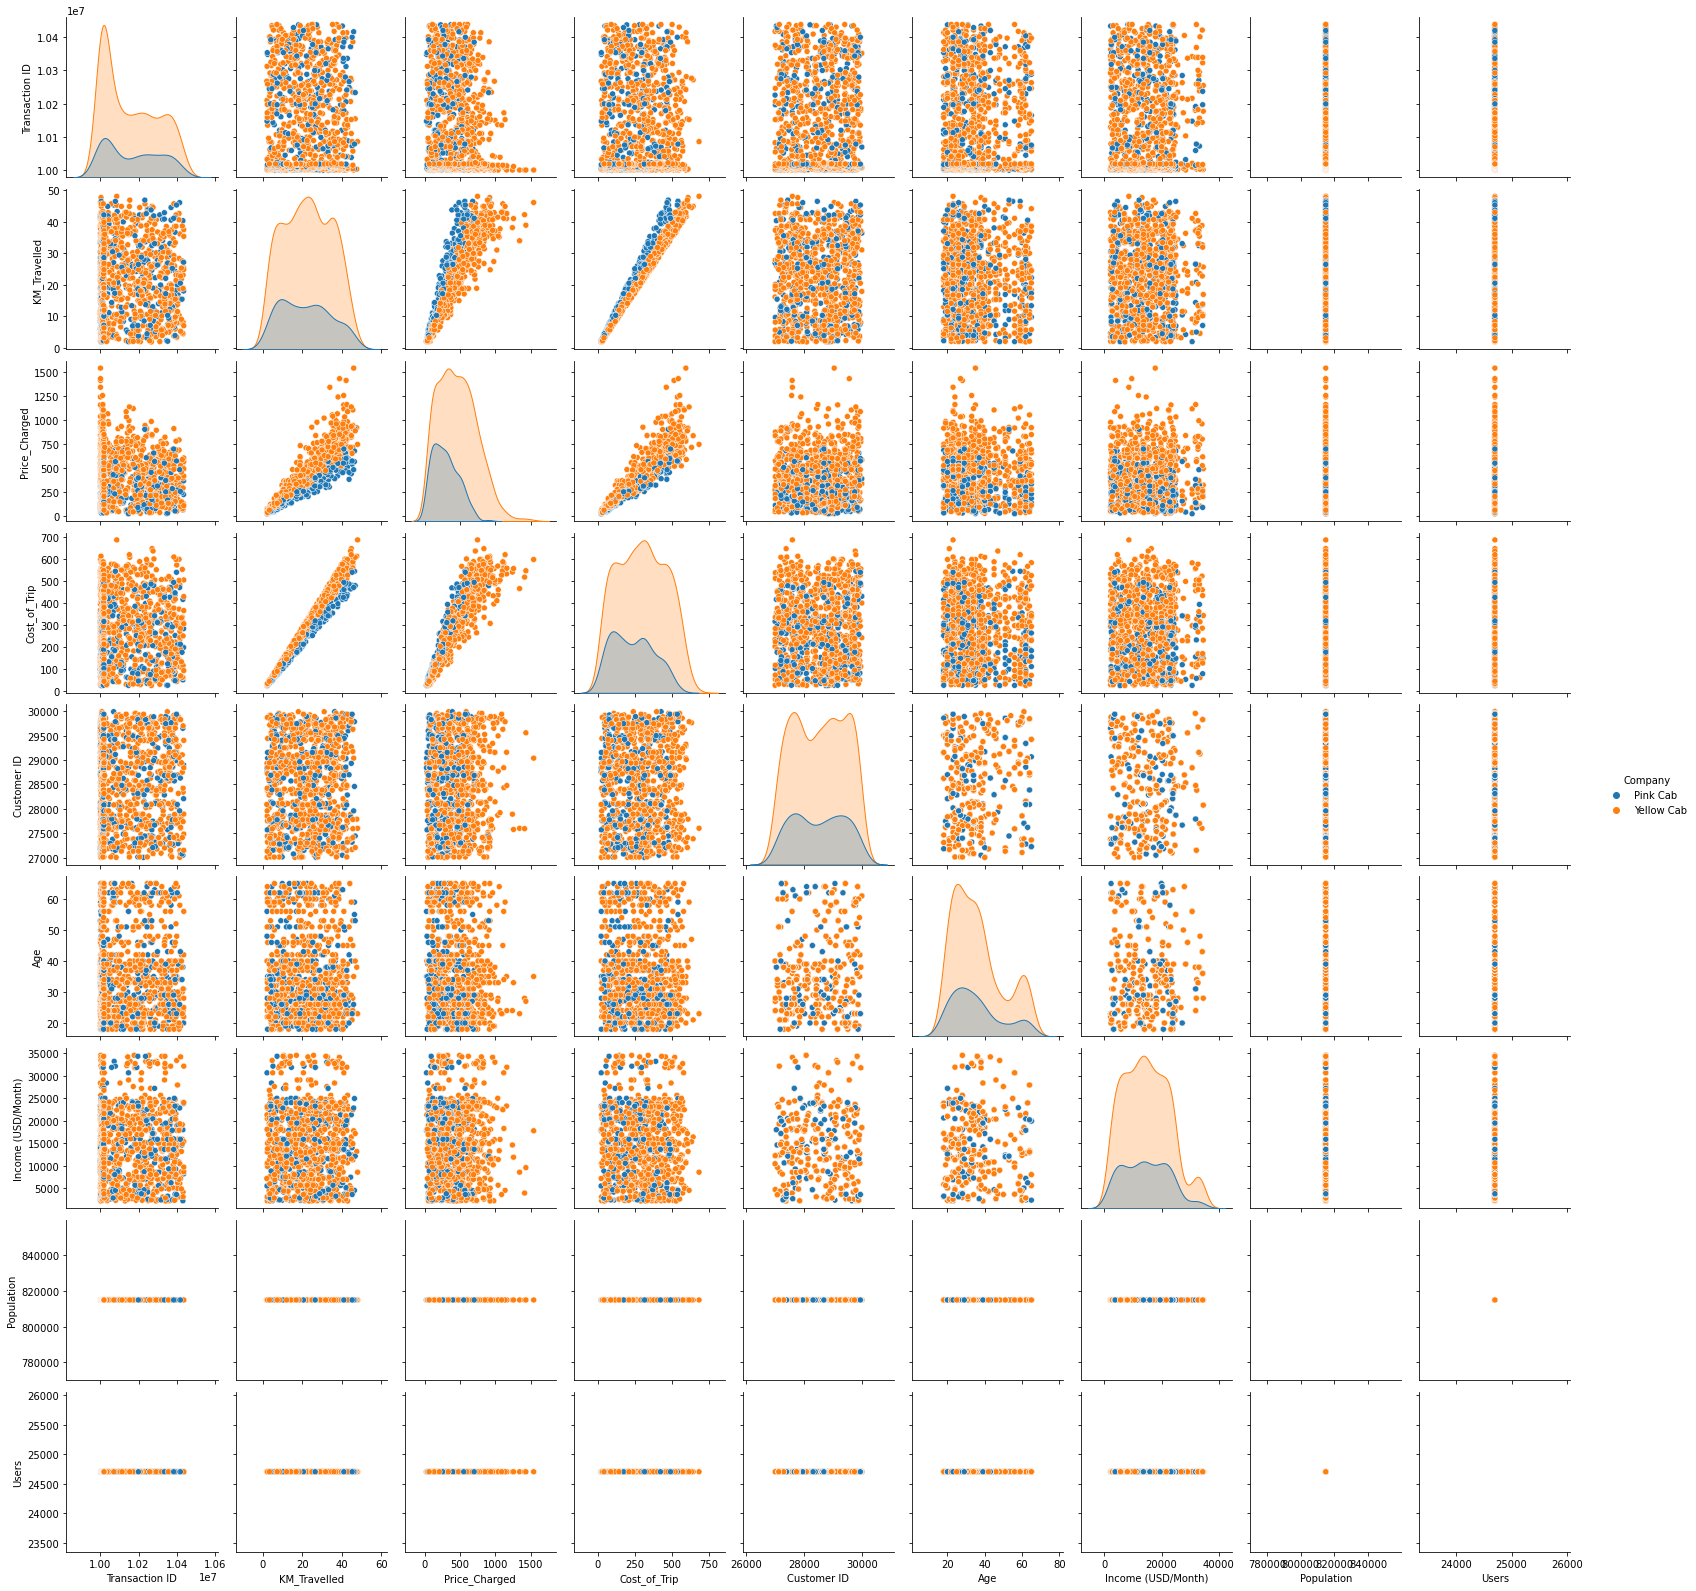

In [50]:
sns.pairplot(df_master.head(1000), hue = 'Company')

**2.02 CORRELATION ANALYSIS**

In [51]:
corr = df_master.corr()
corr

,Transaction ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM_Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price_Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost_of_Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


**Represent visually**

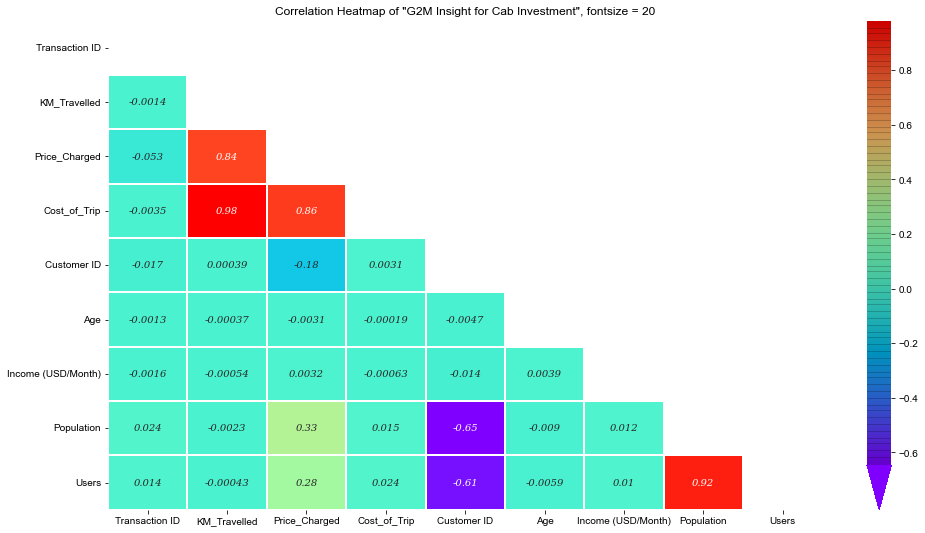

In [52]:
# Size of the figure
plt.figure(figsize = (16, 9))

# Annot customization
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customizing the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# taking upper correlation matrix
matrix = np.triu(corr)

# Heatmap correlation generation
ax = sns.heatmap(corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)


It is clear that Population and Users are highly correlated; Price KM Travelled, Cost of Trip, and Price Charged are highly correlated. On the contrary, Customer ID is negatively correlated with both Population and Users.

**2.03 CAB SERVICE PREFERENCES**

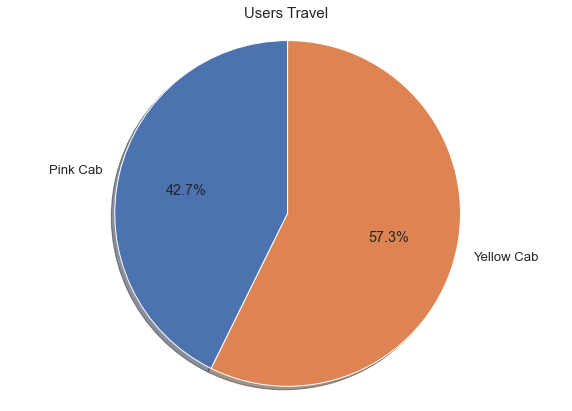

In [53]:
users = df_master.groupby('Company')
avg_users = users.Users.mean()
index = avg_users.index
value = avg_users.values

figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

Yellow Cab has more clients than Pink Cab

**2.04 PRICES**

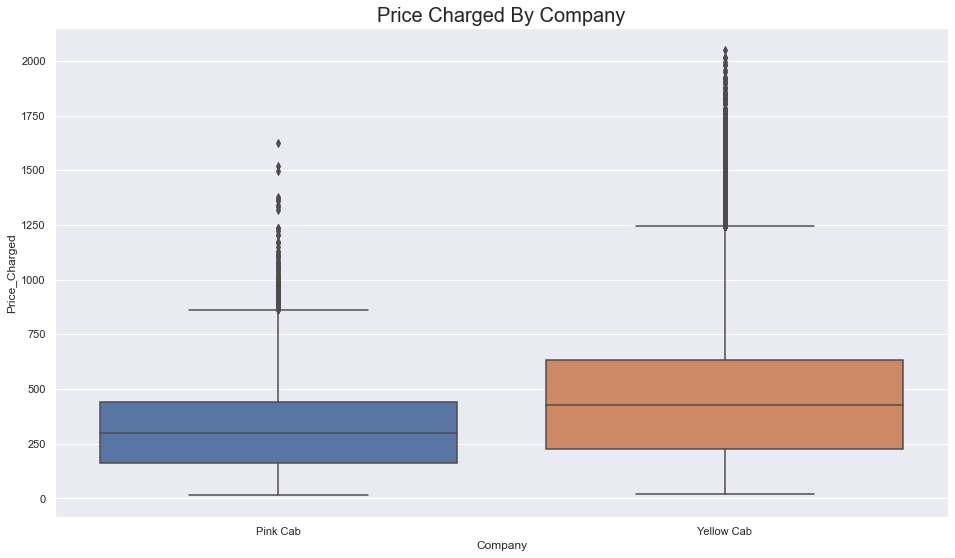

In [54]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(df_master['Company'], df_master['Price_Charged'])
plt.title('Price Charged By Company', fontsize=20)
plt.show()

Yellow Cab is more expensive than Pink Cab.

**2.05 METHOD OF PAYMENT**

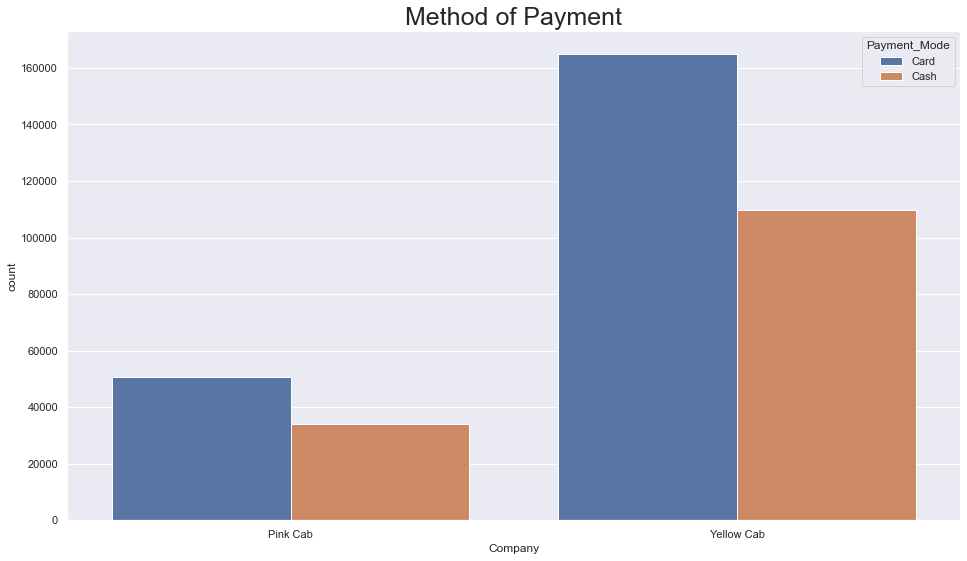

In [55]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df_master)
plt.title('Method of Payment', fontsize=25)
plt.show()

It is clear that the most used payment method is by card. In addition, more payments are made for Yellow cab.

**2.06 SHARE OF CUSTOMERS BY GENDER**

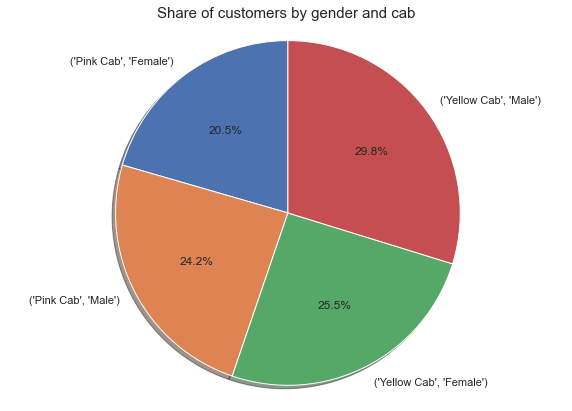

In [56]:
users_by_gender = df_master.groupby(['Company','Gender'])
users_by_gender = users_by_gender['Customer ID'].nunique()
labs = users_by_gender.index
vals = users_by_gender.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Share of customers by gender and cab', fontsize = 15)
plt.show()

The pie shows that there are more males using cabs. Yellow Cab has over 55 % of the market.

**2.07 TRAVELLED KM**

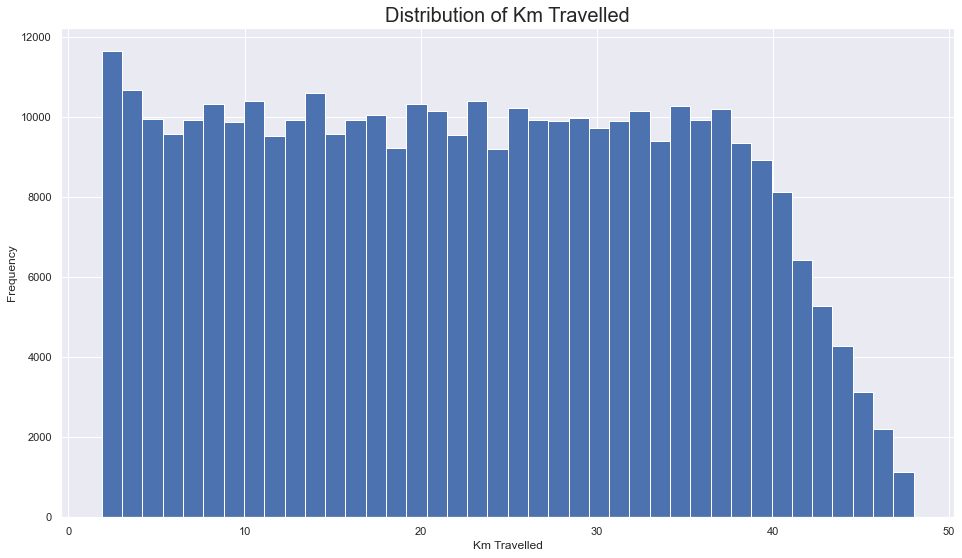

In [57]:
plt.figure(figsize = (16, 9))
plt.hist(df_master['KM_Travelled'], bins = 40)
plt.title('Distribution of Km Travelled', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

Rides vary between 2 to 48 KM, with rides under 40 KM as the most commom.

**2.08 USERS POPULATION BY CITY**

In [58]:
users_population = (df_city['Users'] /df_city['Population']) * 100 
city = df_city['City']


# Get the list of color
from random import randint

colors = []
n = 16

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    

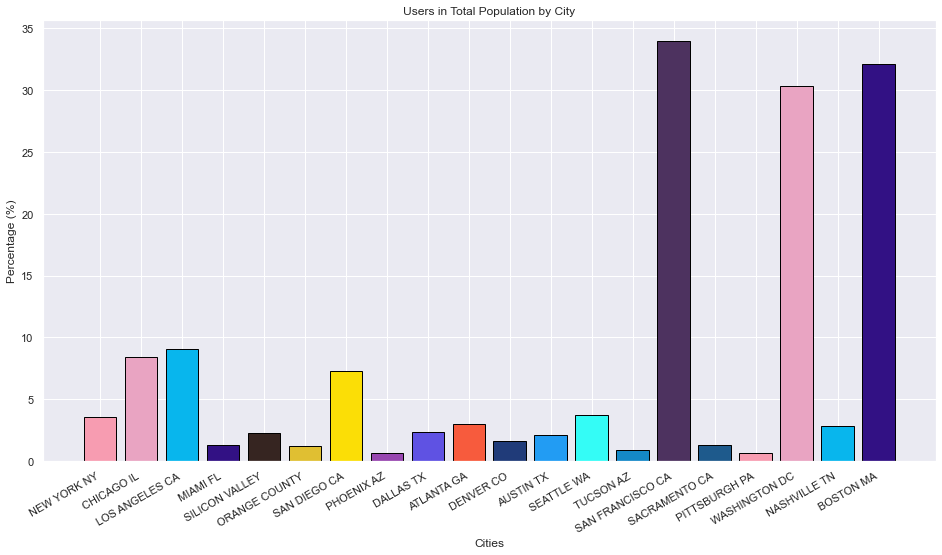

In [59]:
plt.figure(figsize = (16, 9))
plt.bar(city, users_population, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users in Total Population by City')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show() 

San Francisco, Boston, and California have more than a third of their population using cabs.

**2.09 USERS AGE**

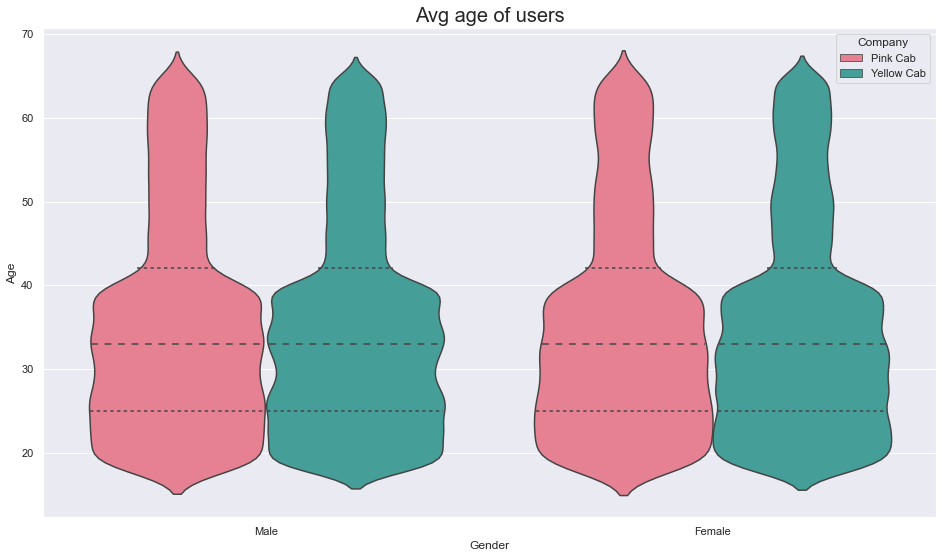

In [60]:
sns.set(style = 'darkgrid') 

plt.figure(figsize = (16, 9))

sns.violinplot(df_master['Gender'], df_master['Age'], hue = df_master['Company'], palette = 'husl', inner = 'quartiles')
plt.title('Avg age of users', fontsize=20)
plt.show()

The average age of cab users is 34.

**2.10 USERS INCOME**

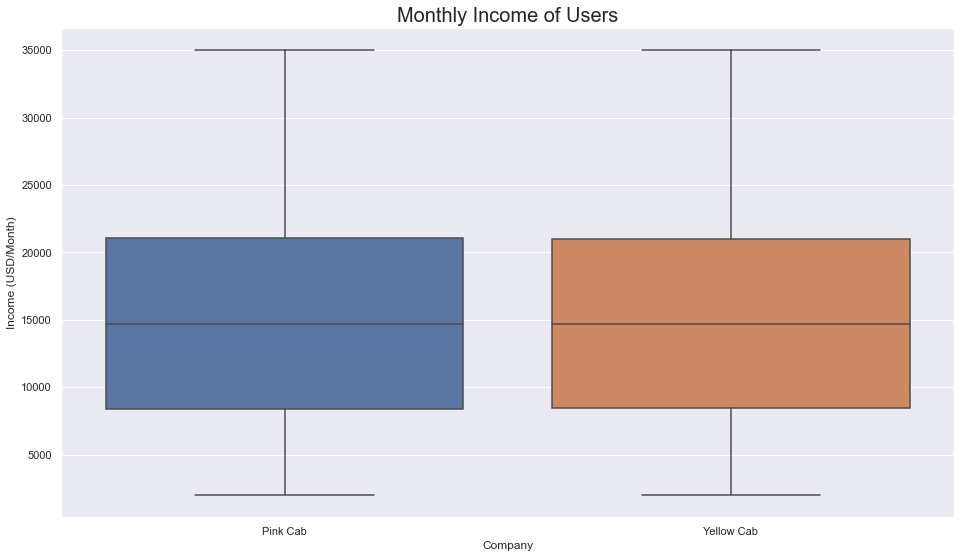

In [61]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (16, 9))

sns.boxplot(df_master['Company'], df_master['Income (USD/Month)'])
plt.title('Monthly Income of Users', fontsize=20)
plt.show()

The average monthly income is approximately 15000$

**2.11 PROFIT**

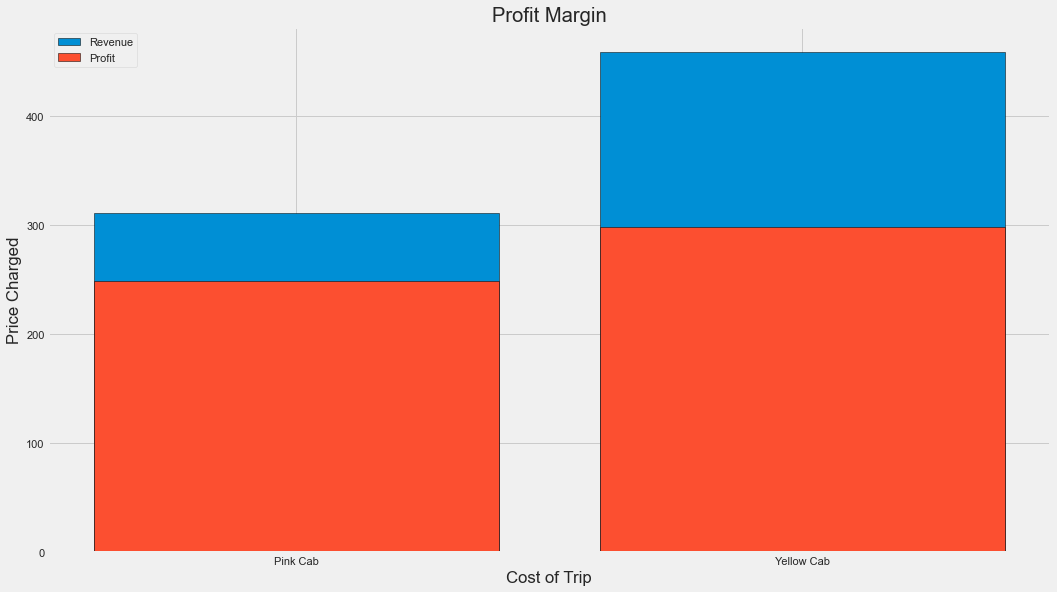

In [62]:
company = df_master.groupby('Company')
price_charged = company['Price_Charged'].mean()
cost_of_trip = company['Cost_of_Trip'].mean()
c = cost_of_trip.index
c_v = cost_of_trip.values
c_p = price_charged.values

plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

Yellow Cab profit margin is higher than that of Pink Cab.

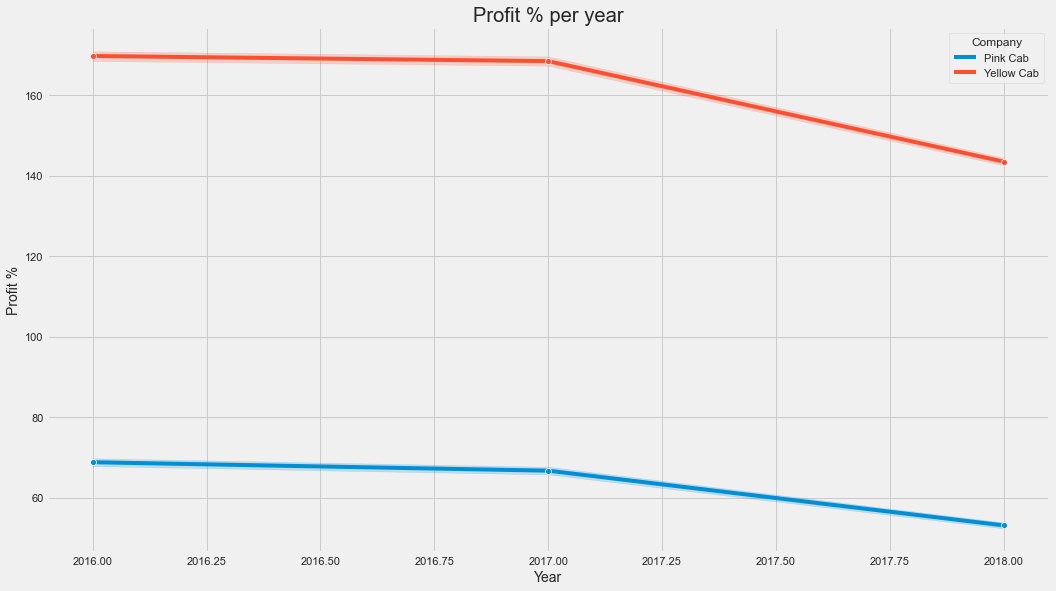

In [63]:
df_master['Year'] = df_master['Date of Travel'].dt.year
df_master['Month'] = df_master['Date of Travel'].dt.month
df_master['Day'] = df_master['Date of Travel'].dt.day
df_master['Profit'] = df_master['Price_Charged'] - df_master['Cost_of_Trip']

plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df_master, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

Profit margin decreases with year.

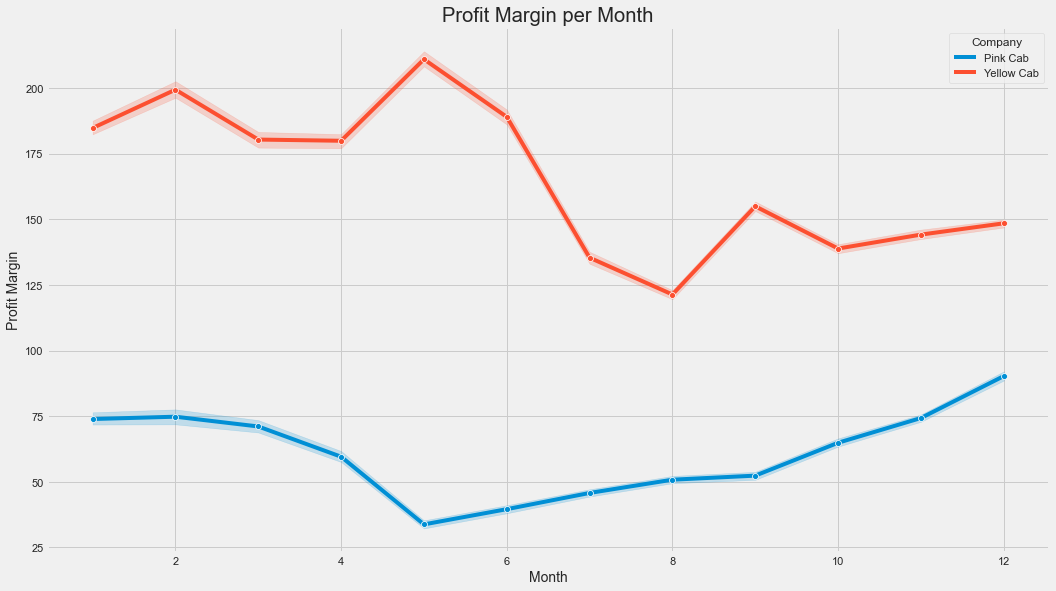

In [64]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df_master, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit Margin", size=14)
plt.title("Profit Margin per Month")
plt.show()

Profit margin is not constant for the twelve months of a year.

**2.12 PRICE AND DISTANCE**

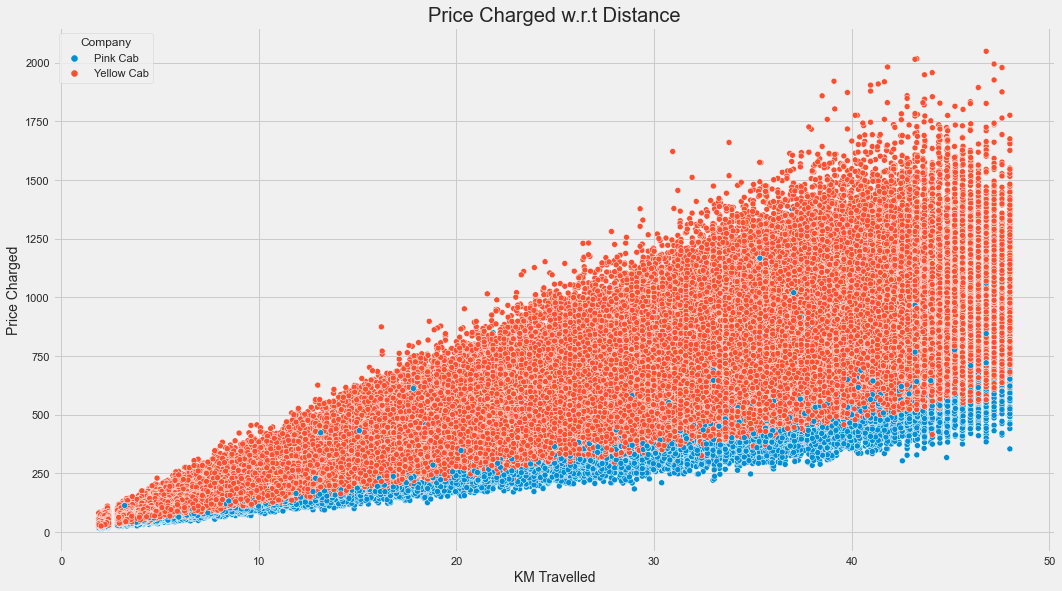

In [65]:
plt.figure(figsize = (16, 9))

sns.scatterplot(data=df_master, x="KM_Travelled", y='Price_Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

KM travelled and price are linearly related. In addition, Pink Cab's rate is lower than that of Yellow Cab.

**2.13 PERCENTAGE OF USERS PER LOCATION (CITY)**

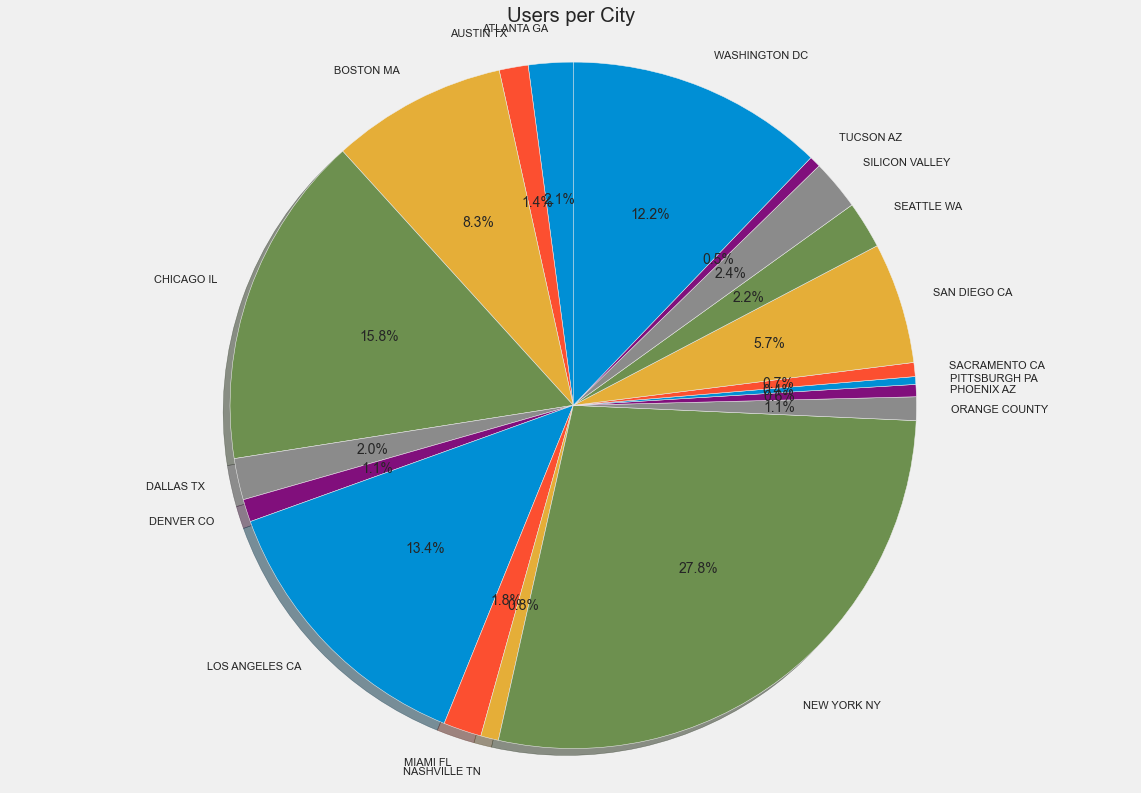

In [66]:
users_by_city = df_master.groupby('City')
users_by_city = users_by_city.Users.count()
labs = users_by_city.index
vals = users_by_city.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

New York, Chicago, and Los Angeles have the highest percentages of cab users with 28, 16, and 13%, respectively.

# 3 HYPOTHESIS INVESTIGATION

**3.1 HYPOTHESIS 1: IS THERE ANY DIFFERENCE IN PROFITS BY PAYMENT METHOD FOR YELLOW CAB?**
    
**H0**: There is no difference in the profits generated by payment method for Yellow Cab.

**H1**: There is a difference in the profits generated by payment method for Yellow Cab.   

In [90]:
aa = df_master[(df_master['Payment_Mode']=='Cash')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
bb = df_master[(df_master['Payment_Mode']=='Card')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(aa.shape[0],bb.shape[0])
_, p_value = stats.ttest_ind(aa.values, bb.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1) that there is a difference in the profits by payment method for Yellow Cab')
else:
    print('We accept the null hypothesis (H0) that there is no difference in the profits by payment method for Yellow Cab')

109896 164785
P value is  0.2933060638298729
We accept the null hypothesis (H0) that there is no difference in the profits by payment method for Yellow Cab


**3.2 HYPOTHESIS 2: IS THERE ANY DIFFERENCE IN PROFITS BY PAYMENT METHODS FOR PINK CAB?**
    
**H0**: There is no difference in the profits generated by payment method for Pink Cab.

**H1**: There is a difference in the profits generated by payment method for Pink Cab. 

In [89]:
cc = df_master[(df_master['Payment_Mode']=='Cash')&(df_master.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
dd = df_master[(df_master['Payment_Mode']=='Card')&(df_master.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(cc.shape[0],dd.shape[0])
_, p_value = stats.ttest_ind(cc.values, dd.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1) that there is a difference in profits by payment method for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in profits by payment method for Pink Cab')

33992 50719
P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in profits by payment method for Pink Cab


**3.3 HYPOTHESIS 3: IS THERE ANY DIFFERENCE IN PROFITS BY GENDER FOR PINK CAB?**

**H0**: There is no difference in profits generated by gender for Pink Cab.

**H1**: There is a difference in profits generated by gender for Pink Cab.

In [99]:
ee = df_master[(df_master.Gender=='Male')&(df_master.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
ff = df_master[(df_master.Gender=='Female')&(df_master.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(ee.shape[0],ff.shape[0])

_, p_value = stats.ttest_ind(ee.values, ff.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in profits by gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in profits by gender for Pink Cab')


47231 37480
P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference in profits by gender for Pink Cab


**3.4 HYPOTHESIS 3: IS THERE ANY DIFFERENCE IN PROFITS BY GENDER FOR YELLOW CAB?**

**H0**: There is no difference in profits generated by gender for Pink Cab.

**H1**: There is a difference in profits generated by gender for Pink Cab.

In [98]:
gg = df_master[(df_master.Gender=='Male')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
hh = df_master[(df_master.Gender=='Female')&(df_master.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(gg.shape[0],hh.shape[0])

_, p_value = stats.ttest_ind(gg.values, hh.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1) that there is a difference in profits by gender for Yellow Cab')
else:
    print('We accept the null hypothesis (H0) that there is no difference in profits by gender for Yellow Cab')


158681 116000
P value is  6.060473042494144e-25
We accept the alternative hypothesis (H1) that there is a difference in profits by gender for Yellow Cab


There is a difference in profits generated by gender for Yellow Cab.

**3.4 HYPOTHESIS 3: IS THERE ANY DIFFERENCE IN PROFITS BY AGE FOR PINK CAB?**

**H0**: There is no difference in profits generated by age for Pink Cab.

**H1**: There is a difference in profits generated by age for Pink Cab.

In [97]:
jj = df_master[(df_master.Age <= 60)&(df_master.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
kk = df_master[(df_master.Age >= 60)&(df_master.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(jj.shape[0],kk.shape[0])

_, p_value = stats.ttest_ind(jj.values, kk.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1) that there is a difference in profits by age for Pink Cab')
else:
    print('We accept the null hypothesis (H0) that there is no difference in profits by age for Pink Cab')

80125 5429
P value is  0.4816748536155635
We accept the null hypothesis (H0) that there is no difference in profits by age for Pink Cab


**3.4 HYPOTHESIS 3: IS THERE ANY DIFFERENCE IN PROFITS BY AGE FOR YELLOW CAB?**

**H0**: There is no difference in profits generated by age for Yellow Cab.

**H1**: There is a difference in profits generated by age for Yellow Cab.

In [96]:
mm = df_master[(df_master.Age <= 60)&(df_master.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
nn = df_master[(df_master.Age >= 60)&(df_master.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(mm.shape[0],nn.shape[0])

_, p_value = stats.ttest_ind(mm.values, nn.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept the alternative hypothesis (H1) that there is a difference in profits by age for Yellow Cab')
else:
    print('We accept the null hypothesis (H0) that there is no difference in profits by age for Yellow Cab')


260356 17257
P value is  6.328485471267631e-05
We accept the alternative hypothesis (H1) that there is a difference in profits by age for Yellow Cab


It appears that Yellow Cab offers discount to customers aged more than 60